#  Imports
Let's start by importing the libraries we will need for this project. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

#constants
LOCALIZATION = 0
OCCUPANCY = 1
FREE = 0
OCCUPIED = 1

# Map initialisation 
This is the map on which we apply the path planning algorithm. 
- The map has a size 45 (along the y axis) x 42 cells (along the x axis) 
- The location of the obstacles vary and is obtained through the vision step 
- An occupied cell has a value 1
- An free cell has a value 0

In [2]:
def display_map(grid, type_map):
    """
    Display a map (either localization grid or occupancy grid)
    
    :param grid: 2D matrix containing the values of each cell in the map 
    :param type_map: specify the type of map  and can take 2 values (LOCALIZATION or OCCUPANCY)
    
    :return: the fig and ax objects.
    """
    fig, ax = plt.subplots(figsize=(7,7))
    
    major_ticks_x = np.arange(0, 42+1, 5)
    minor_ticks_x = np.arange(0, 42+1, 1)
    major_ticks_y = np.arange(0, 45+1, 5)
    minor_ticks_y = np.arange(0, 45+1, 1)
    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.set_ylim([0,45])
    ax.set_xlim([0,42])
    ax.grid(True)
    
    
    if type_map == OCCUPANCY:
        # Select the colors with which to display obstacles and free cells
        cmap = colors.ListedColormap(['white', 'red'])
        
        # Displaying the map
        # ax.imshow(grid, cmap=cmap, extent=[0, 42, 0, 45])
        ax.imshow(grid, cmap=cmap)
        plt.title("Map : free cells in white, occupied cells in red");
    
    elif type_map == LOCALIZATION:
        cmap = colors.ListedColormap(['white', 'black'])
        
        # Displaying the map
        ax.imshow(grid, cmap=cmap, extent=[0, 42, 0, 45])
        plt.title("Localization grid");
        
    return fig,ax


def create_occupancy_grid():
    """
    Create the occupancy grid
    
    return: A 2D matrix filled with 0's (free cells) and 1's (occupied cells) representing the occupancy map
    """
    occupancy_grid = np.zeros((42, 45))
    
    # obstacle 1
    occupancy_grid[14:16,40:45] = OCCUPIED
    
    # obstacle 2
    occupancy_grid[0:9,18] = OCCUPIED
    occupancy_grid[4:8,19] = OCCUPIED
    occupancy_grid[4:7,20] = OCCUPIED
    occupancy_grid[4:6,21] = OCCUPIED
    occupancy_grid[4,22] = OCCUPIED
    
    # obstacle 3
    occupancy_grid[34:,29] = OCCUPIED
    
    # obstacle 4
    occupancy_grid[21:26,9:14] = OCCUPIED

    return occupancy_grid

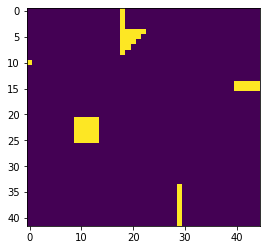

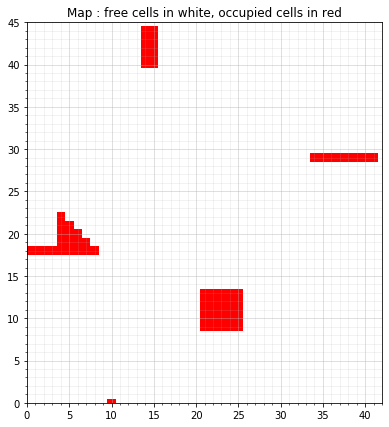

In [3]:
occupancy_grid = create_occupancy_grid()
occupancy_grid[10,0] = 1
plt.figure()
plt.imshow(occupancy_grid)
fig, ax = display_map(occupancy_grid.transpose(), OCCUPANCY)

# Localization cell grid 
This is the grid that helps Thymio to localize itself. 
- The map has a size 45 (along the y axis) x 42 cells (along the x axis) 
- A black cell has a value 1
- A white cell has a value 0

In [4]:
def create_localization_grid():
    """
    Create the localization grid, that will help Thymio to localize itself 
    
    return: A 2D matrix filled with 0's (white cells) and 1's (black cells) representing the localization map
    """
    localization_grid = np.zeros((45, 42))
    
    localization_grid[0,:]  = [1,0,0,0,1,1,0,0,1,0, 1,1,1,1,1,1,0,0,1,1,0, 1,0,1,0,1,1,0,1,1,0,1, 0,0,1,0,0,1,0,0,0,0]
    localization_grid[1,:]  = [0,1,0,1,0,0,1,1,1,1, 1,1,1,0,0,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1,1, 0,1,1,1,1,1,0,0,1,1]
    localization_grid[2,:]  = [0,1,1,1,0,1,0,1,1,1, 1,0,0,1,1,0,0,1,1,0,1, 0,1,0,0,1,0,0,0,0,0,1, 0,1,0,1,1,1,1,1,1,0]
    localization_grid[3,:]  = [1,1,0,0,0,1,1,0,0,0, 1,0,0,1,0,1,0,1,0,1,1, 0,0,1,0,1,0,0,1,1,0,0, 0,0,0,1,1,1,1,1,1,1]
    localization_grid[4,:]  = [1,1,1,0,0,1,0,0,0,1, 1,0,0,0,0,0,1,0,1,1,1, 1,0,1,1,1,0,1,0,1,1,1, 1,0,0,0,1,1,0,1,1,1]
    localization_grid[5,:]  = [1,0,1,1,0,1,0,1,0,1, 1,1,0,1,1,0,1,0,1,1,1, 1,1,0,1,1,0,1,1,0,0,1, 0,1,0,0,0,1,0,1,0,0]
    localization_grid[6,:]  = [0,1,0,1,1,1,0,0,0,0, 1,0,1,1,0,0,1,1,0,1,1, 0,1,0,0,1,0,0,0,0,0,1, 0,0,0,1,1,0,0,0,0,0]
    localization_grid[7,:]  = [0,1,0,1,1,1,0,0,0,0, 1,1,0,1,0,1,1,1,0,0,0, 1,0,0,0,0,0,0,0,0,1,1, 0,0,0,1,1,0,0,1,1,1]
    localization_grid[8,:]  = [0,1,1,0,1,0,0,1,1,1, 1,0,0,1,0,1,0,1,1,1,1, 1,1,0,1,0,1,1,0,0,0,1, 1,0,1,0,0,0,1,1,0,0]
    localization_grid[9,:]  = [0,1,0,0,1,1,1,1,0,1, 0,1,1,0,0,1,1,1,1,0,1, 0,1,1,1,1,0,1,0,1,0,1, 1,0,0,1,0,1,1,0,0,1]
    localization_grid[10,:] = [1,1,1,1,1,1,0,1,0,0, 1,0,0,1,0,1,1,0,0,1,1, 0,0,1,1,0,0,0,0,0,1,1, 0,0,1,1,1,1,1,0,0,0]
    localization_grid[11,:] = [0,1,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,0,0,0,1,0, 1,0,0,1,1,1,1,0,1,0,0, 1,1,1,0,1,1,0,0,1,0]
    localization_grid[12,:] = [1,1,0,1,1,1,0,0,0,0, 0,1,0,0,1,0,0,1,1,1,1, 0,0,1,0,1,0,0,1,0,1,1, 0,0,1,0,0,1,1,0,1,0]
    localization_grid[13,:] = [0,0,0,1,1,0,1,1,0,0, 1,1,1,1,1,0,0,1,0,1,1, 1,1,1,0,1,1,0,0,1,0,1, 1,1,0,1,1,1,0,0,1,1]
    localization_grid[14,:] = [1,1,1,1,0,1,1,1,1,0, 1,0,1,0,1,1,0,0,1,1,0, 1,0,0,0,0,0,1,1,0,1,0, 0,0,0,0,1,0,0,1,0,0]
    
    localization_grid[15,:] = [0,1,0,0,0,1,0,1,0,1, 1,1,0,1,1,1,0,1,1,0,0, 0,0,0,1,1,1,1,1,1,1,0, 0,1,1,1,0,1,1,0,1,1]
    localization_grid[16,:] = [1,1,1,1,1,1,1,0,0,0, 1,0,1,0,1,1,0,0,0,1,0, 0,0,1,0,0,0,1,1,1,0,1, 1,0,1,0,0,1,0,1,1,1]
    localization_grid[17,:] = [1,1,0,0,0,1,1,1,1,1, 0,1,1,1,0,1,0,0,1,0,0, 1,0,0,1,1,0,0,1,0,0,0, 0,1,1,0,1,1,1,0,1,0]
    localization_grid[18,:] = [0,1,1,1,1,0,0,0,1,0, 0,1,1,1,1,0,1,0,1,1,1, 1,0,0,0,0,1,1,1,0,1,0, 0,0,0,1,1,1,1,1,0,1]
    localization_grid[19,:] = [0,0,1,0,1,1,0,1,1,0, 1,1,1,1,1,1,1,0,0,1,1, 0,0,1,0,0,0,1,0,1,1,0, 1,1,0,0,0,1,1,0,1,1]
    localization_grid[20,:] = [1,1,1,0,0,0,0,0,1,1, 1,1,1,1,1,1,0,1,0,0,0, 0,0,0,0,1,1,1,0,1,1,1, 0,1,0,1,1,1,1,1,1,0]
    localization_grid[21,:] = [0,0,1,0,0,0,1,1,1,0, 0,1,0,0,0,1,1,1,1,0,1, 1,0,0,0,1,0,1,1,1,0,0, 0,0,1,1,0,0,0,1,0,1]
    localization_grid[22,:] = [1,1,0,1,0,0,1,1,1,0, 1,1,0,1,0,1,0,1,0,0,1, 1,0,1,1,1,1,0,1,0,1,1, 0,0,1,1,0,1,0,1,1,0]
    localization_grid[23,:] = [0,1,0,1,0,1,1,1,0,1, 0,1,0,0,0,1,0,1,0,0,0, 0,0,1,0,1,1,0,0,1,0,1, 1,0,0,1,0,0,0,1,1,0]
    localization_grid[24,:] = [1,1,0,1,0,0,0,1,0,0, 1,1,1,1,1,1,0,1,1,1,1, 1,0,1,0,1,0,0,1,0,1,1, 0,0,0,1,1,1,1,1,1,1]
    localization_grid[25,:] = [0,0,0,1,0,1,1,0,0,0, 1,1,1,0,0,1,1,1,1,0,1, 1,1,1,0,1,1,1,1,1,1,1, 0,1,0,1,1,1,1,1,0,0]
    localization_grid[26,:] = [0,0,0,1,1,0,1,0,1,1, 1,1,0,0,0,0,1,1,0,0,0, 0,1,1,0,0,0,0,0,0,0,0, 0,0,0,1,1,1,1,0,1,0]
    localization_grid[27,:] = [1,1,0,0,1,1,0,0,0,0, 1,1,1,0,0,0,1,0,1,0,1, 1,0,1,1,0,0,0,1,0,1,0, 1,1,0,0,0,0,0,0,1,1]
    localization_grid[28,:] = [0,1,0,0,1,1,1,0,1,1, 1,1,0,0,1,1,1,0,1,1,1, 0,0,1,1,0,0,1,0,1,0,1, 1,0,1,1,0,0,1,1,1,0]
    localization_grid[29,:] = [0,0,1,1,1,1,1,1,1,0, 1,1,0,1,0,0,1,1,1,1,0, 1,0,1,1,1,0,0,0,0,1,0, 0,1,1,1,0,0,0,1,1,0]
    localization_grid[30,:] = [1,0,0,0,1,1,0,1,1,0, 1,0,1,0,1,1,1,0,1,1,0, 1,0,1,1,1,0,1,1,1,0,1, 1,1,0,1,0,1,1,0,0,0]
    
    localization_grid[31,:] = [0,0,0,0,0,1,0,1,1,1, 0,0,0,0,0,1,0,1,1,0,1, 1,0,0,0,1,0,0,0,1,0,0, 0,1,1,0,1,0,1,1,1,1]
    localization_grid[32,:] = [0,0,1,1,1,0,0,0,0,1, 1,0,0,1,0,1,1,0,0,1,1, 1,0,0,0,1,1,1,0,0,0,1, 1,0,1,1,0,1,1,0,1,0]
    localization_grid[33,:] = [1,1,0,0,1,0,0,1,1,0, 0,1,1,0,1,1,1,1,0,0,1, 0,1,0,0,1,1,1,1,1,0,1, 1,0,0,1,0,1,0,0,1,0]
    localization_grid[34,:] = [1,1,0,1,1,1,0,0,0,1, 1,0,0,1,0,0,0,1,1,1,0, 0,0,1,0,0,1,1,0,0,1,0, 0,1,0,1,0,1,1,0,1,0]
    localization_grid[35,:] = [0,0,1,1,1,1,1,0,1,1, 0,1,1,1,0,1,0,0,1,1,1, 1,1,0,1,0,1,1,1,0,1,0, 1,1,1,1,1,0,1,0,1,0]
    localization_grid[36,:] = [0,1,0,1,0,1,1,1,0,0, 0,1,1,1,0,0,0,0,0,1,0, 0,0,1,1,0,1,0,0,1,0,1, 1,1,1,1,1,1,0,1,1,1]
    localization_grid[37,:] = [1,0,1,1,0,0,1,1,0,1, 0,0,0,0,0,1,1,1,1,1,0, 1,0,0,1,1,1,1,1,1,0,1, 0,1,1,0,0,0,0,1,0,0]
    localization_grid[38,:] = [0,1,1,0,1,0,1,0,0,1, 0,0,1,1,0,1,0,0,1,1,1, 1,1,1,1,1,1,0,0,1,0,1, 1,0,1,1,0,1,0,0,0,0]
    localization_grid[39,:] = [0,1,1,1,1,1,1,1,1,1, 1,0,0,0,1,1,1,0,1,0,1, 0,0,0,1,1,0,1,1,1,1,1, 0,0,1,1,1,1,1,1,1,1]
    localization_grid[40,:] = [0,1,0,0,1,1,0,1,0,1, 0,1,0,1,1,0,1,0,0,1,1, 1,0,1,0,0,0,1,1,0,0,1, 1,1,1,1,1,1,1,0,0,1]
    localization_grid[41,:] = [1,0,1,1,1,0,0,1,0,0, 1,1,0,0,0,0,1,0,0,1,1, 1,1,1,0,1,1,1,1,0,1,1, 0,1,0,0,0,1,0,1,0,0]
    localization_grid[42,:] = [0,1,0,0,1,1,1,1,1,0, 1,0,0,1,1,1,1,0,0,1,1, 1,0,0,0,0,0,0,1,0,1,0, 0,0,1,1,0,1,1,1,0,1]
    localization_grid[43,:] = [1,1,1,1,0,1,0,1,0,1, 0,1,1,1,0,1,0,1,0,1,0, 1,1,1,1,1,0,1,0,0,0,0, 1,1,0,0,1,0,0,1,1,1]
    localization_grid[44,:] = [0,1,1,0,1,0,1,0,1,1, 0,1,1,1,1,1,0,0,0,1,0, 0,0,0,1,0,1,1,1,1,0,1, 0,1,1,1,1,1,1,1,0,1]
    
    return localization_grid

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9dc9209d0>)

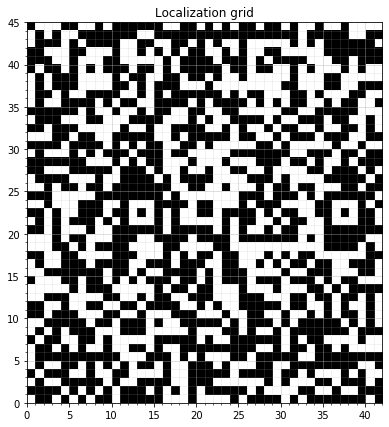

In [5]:
localization_grid = create_localization_grid()
display_map(localization_grid, LOCALIZATION)

# Global path planning
We decided tu use the A* algorithm to find the optimal path to the goal, because if $h(n)$ is a consistent heuristic, then A* is optimally efficient among all optimal search algorithms using $h(n)$. Indeed, no other optimal algorithm using $h(n)$ is guaranteed to expand fewer nodes than A*.

The A* algorithm expandes the node n with the smallest $f(n) = g(n) + h(n)$, where $g(n)$ denotes the cheapest path cost from the starting node and $h(n)$ the heuristic function.

$h(n)$ is consistent if the $f(n)$ costs are non-decreasing : $f(n_j)\geq f(n_i) $ (going from a node i to a node j). The heuristic function has been chosen h(n) as the estimation of the cost to reach goal from node n. This specific heuristic function is consistant, because $h(n_i)\geq cost(n_i, n_j)+h(n_j)$, hence A* is optimally efficient. 

First of all, in order to consider the robot as a point in the path planning algorithm, we need to increase the size of the obstacles by the radius of the robot.

In [6]:
def increased_obstacles_map(occupancy_grid):
    
    nb_rows = len(occupancy_grid)
    nb_cols = len(occupancy_grid[0])
    increased_occupancy_grid = np.zeros([nb_rows+6, nb_cols+6])
    
    for i in range(len(occupancy_grid)):
        for j in range(len(occupancy_grid[0])):
            
            if occupancy_grid[i,j] == OCCUPIED:
                increased_occupancy_grid[i:i+7,j:j+7] = np.ones([7,7])
                
    
    final_occupancy_grid = increased_occupancy_grid[3:48,3:45]
    return final_occupancy_grid

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9dd061bd0>)

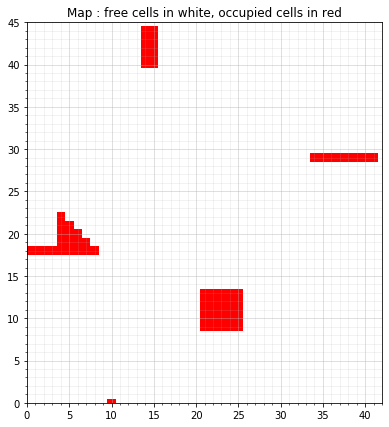

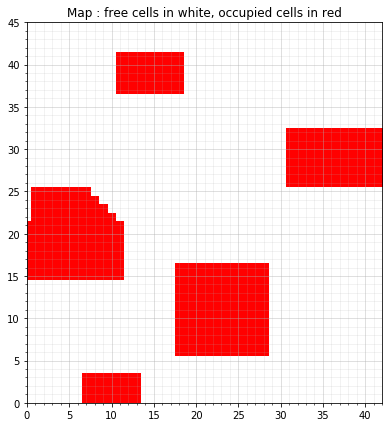

In [7]:
final_occupancy_grid = increased_obstacles_map(occupancy_grid)
display_map(occupancy_grid.transpose(), OCCUPANCY)
display_map(final_occupancy_grid.transpose(), OCCUPANCY)

## A* algorithm
The following function provides the list of all possible movements (knowing that we allow Thymio to move diagonally in the grid)

In [8]:
def _get_movements_8n():
    """
    Get all possible 8-connectivity movements.
    - up 
    - down 
    - left
    - right 
    - first diagonal (up-right)
    - second diagonal (up-left)
    - third diagonal (down-right)
    - fourth diagonal (down-left)
    :return: list of movements with cost [(dx, dy, movement_cost)]
    """
    s2 = math.sqrt(2)
    return [(1, 0, 1.0),
            (0, 1, 1.0),
            (-1, 0, 1.0),
            (0, -1, 1.0),
            (1, 1, s2),
            (-1, 1, s2),
            (-1, -1, s2),
            (1, -1, s2)]

Here is the implementation of the A* algorithm:

In [9]:
###
#
# LIGNES DE COMMENTAIRES A ENLEVER !!!!
###
#

def reconstruct_path(cameFrom, current):
    """
    Recurrently reconstructs the path from start node to the current node
    :param cameFrom: map (dictionary) containing for each node n the node immediately 
                     preceding it on the cheapest path from start to n 
                     currently known.
    :param current: current node (x, y)
    :return: list of nodes from start to current node
    """
    total_path = [current]
    while current in cameFrom.keys():
        # Add where the current node came from to the start of the list (add cameFrom[current] at the 0th index)
        total_path.insert(0, cameFrom[current]) 
        current=cameFrom[current]
    return total_path

def A_Star(start, goal, final_occupancy_grid):
    """
    Execution of the A* algorithm for 2D occupancy grid. Finds a path from start to goal.
    h is the heuristic function. h(n) estimates the cost to reach goal from node n.
    :param start: start node (x, y)
    :param goal: goal node (x, y)
    :param occupancy_grid: the grid map
    :return: a tuple that contains: (the resulting path in meters, the resulting path in data array indices)
    """
    x,y = np.mgrid[0:45:1, 0:42:1]
    pos = np.empty(x.shape + (2,))
    # x.shape = (45,42)
    # x.shape + (2,) = (45,42,2)
    pos[:, :, 0] = x; pos[:, :, 1] = y
    # pos.shape = (1890, 2)
    pos = np.reshape(pos, (x.shape[0]*x.shape[1], 2))
    coords = list([(int(x[0]), int(x[1])) for x in pos])

    # Define the heuristic: 
    # h: dictionary containing the distance to goal ignoring obstacles for all coordinates in the grid (heuristic function)
    h = np.linalg.norm(pos - goal, axis = 1)
    # If axis is an integer, it specifies the axis of x along which to compute the vector norms
    # axis = 1: h.shape  = 1890
    # axis = 0: h.shape  = 2
    h = dict(zip(coords, h))
    
    
    
    # Check if the start and goal are within the boundaries of the map
    for point in [start, goal]:
       
        if point[0]<0 and point[0]>=final_occupancy_grid.shape[0]:
            raise Exception('Start node/goal node is not contained in the map')
  
        if point[1]<0 and point[1]>=final_occupancy_grid.shape[1]:
            raise Exception('Start node/goal node is not contained in the map')
    
    # check if start and goal nodes correspond to free spaces
    if final_occupancy_grid[start[0], start[1]]:
        raise Exception('Start node is not traversable')

    if final_occupancy_grid[goal[0], goal[1]]:
        raise Exception('Goal node is not traversable')
    
    # get the possible movements 
    movements = _get_movements_8n()
    
    # The set of visited nodes that need to be (re-)expanded, i.e. for which the neighbors need to be explored
    # Initially, only the start node is known.
    openSet = [start]
    
    # The set of visited nodes that no longer need to be expanded.
    closedSet = []

    # For node n, cameFrom[n] is the node immediately preceding it on the cheapest path from start to n currently known.
    cameFrom = dict()

    # For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    gScore[start] = 0

    # For node n, fScore[n] := gScore[n] + h(n). map with default value of Infinity
    fScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    fScore[start] = h[start]

    # while there are still elements to investigate
    while openSet != []:
        
        #the node in openSet having the lowest fScore[] value
        fScore_openSet = {key:val for (key,val) in fScore.items() if key in openSet}
        current = min(fScore_openSet, key=fScore_openSet.get)
        del fScore_openSet
        
        #If the goal is reached, reconstruct and return the obtained path
        if current == goal:
            return reconstruct_path(cameFrom, current)
        
        openSet.remove(current)
        closedSet.append(current)
        
        #for each neighbor of current:
        for dx, dy, deltacost in movements:
            
            neighbor = (current[0]+dx, current[1]+dy)
            
            # if the node is not in the map, skip
            if (neighbor[0] >= final_occupancy_grid.shape[0]) or (neighbor[1] >= final_occupancy_grid.shape[1]) or (neighbor[0] < 0) or (neighbor[1] < 0):
                continue
            
            # if the node is occupied, skip
            if (final_occupancy_grid[neighbor[0], neighbor[1]]):
                continue
                
            # if the has already been visited, skip
            if (neighbor in closedSet): 
                continue
            # d(current,neighbor) is the weight of the edge from current to neighbor
            # tentative_gScore is the distance from start to the neighbor through current
            tentative_gScore = gScore[current] + deltacost
            
            if neighbor not in openSet:
                openSet.append(neighbor)
                
            if tentative_gScore < gScore[neighbor]:
                # This path to neighbor is better than any previous one. Record it!
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + h[neighbor]

    # Open set is empty but goal was never reached
    print("No path found to goal")
    return [], closedSet

In [34]:
# Define the start and end goal
start = (5,5)
goal = (35,15)
   
# Run the A* algorithm    
path = A_Star(start, goal, final_occupancy_grid)
path = np.array(path).reshape(-1, 2).transpose()

def display_global_path(start, goal, path, occupancy_grid):

    # Displaying the map
    fig_astar, ax_astar = display_map(occupancy_grid, OCCUPANCY)
    # ax_astar.imshow(occupancy_grid.transpose(), cmap=cmap)

    # Plot the best path found and the list of visited nodes
    ax_astar.plot(path[0], path[1], marker="o", color = 'blue');
    ax_astar.scatter(start[0], start[1], marker="o", color = 'green', s=200);
    ax_astar.scatter(goal[0], goal[1], marker="o", color = 'purple', s=200);
    ax.set_ylim(ax.get_ylim()[::-1])  

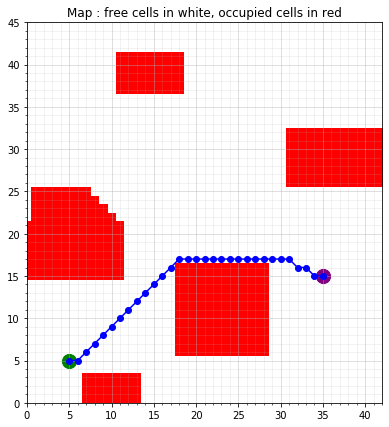

In [35]:
display_global_path(start, goal, path, final_occupancy_grid.transpose())


- white cells : free cells
- red cells : occupied cells
- blue nodes : nodes corresponding to the optimal path
- green circle : starting node
- purple circle : target node

In [36]:
print(path)

print(path[0][1])
print(path[1][1])


[[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
  29 30 31 32 33 34 35]
 [ 5  5  6  7  8  9 10 11 12 13 14 15 16 17 17 17 17 17 17 17 17 17 17 17
  17 17 17 16 16 15 15]]
6
5


In [39]:
RIGHT = 0
LEFT = 1
STRAIGHT = 2


def path_to_command_thymio(path):

    current_x = path[0][0]
    current_y = path[1][0]
    
    next_x = path[0][1]
    next_y = path[1][1]
    
    # next-prev
    delta_x = path[0][1] - path[0][0]
    delta_y = path[1][1] - path[1][0]
    
    
    # delat_x = 0 and delta_y = -/+ 1 (or delat_x = -/+ 1 and delta_y = 0): go straight 
    turn = STRAIGHT
    
    # delat_x = -1 and delta_y = 1 (or delat_x = 1 and delta_y = -1): turn to the right 
    if delta_x*delta_y < 0:
        turn = RIGHT
    
    # delat_x = -1 and delta_y = -1 (or delat_x = 1 and delta_y = 1): turn to the left 
    if delta_x*delta_y == 1:
        turn = LEFT
    
    new_path = np.array([path[0][1:],path[1][1:]])
    
    return turn, new_path 



In [40]:

# this code gives a sequence of RIGHT; LEFT; STRAIGHT commands corresponding to the entire global path planning
# i.e to go from the start to the goal
new_path = path
for i in range(len(path[0])-1):
    
    turn, new_path = path_to_command_thymio(new_path)
    
    if turn == RIGHT:
        # turn 45 degrees to the right 
        # --------------------------------------
        #           ADD CODE HERE
        # --------------------------------------
        #
        # move forward by the length of the diagonal of a square : 3cm?
        # --------------------------------------
        #           ADD CODE HERE
        # --------------------------------------
        a = 1
        
    if turn == LEFT:
        # turn 45 degrees to the left
        # --------------------------------------
        #           ADD CODE HERE
        # --------------------------------------
        #
        # move forward by the length of the diagonal of a square : 3cm?
        # --------------------------------------
        #           ADD CODE HERE
        # --------------------------------------
        a = 2
        
    if turn == STRAIGHT:
        # move forward by the length of the side of a square : 2cm?
        # --------------------------------------
        #           ADD CODE HERE
        # --------------------------------------
        a = 3
        
    print(turn)
    

2
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
0
2
0
2
